In [2]:
import pandas as pd
import sys
import numpy as np
from scipy.misc import imshow, imresize
import imageio
import os

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import scipy.stats as ss

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [51]:
y_pred = np.load("/atlas/u/esheehan/wikipedia_project/dataset/GUF_dataset/output/baselineDoc2VecModelOut/pred_test/pred_UGA_GHA.npy")
y_true = np.load("/atlas/u/esheehan/wikipedia_project/dataset/GUF_dataset/output/baselineDoc2VecModelOut/pred_test/test_UGA_GHA.npy")

In [52]:
pred_rank = ss.rankdata(y_pred)
true_rank = ss.rankdata(y_true)

297.2713936430318


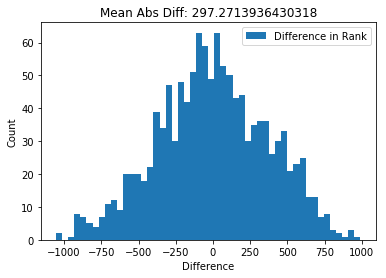

In [54]:
fig, ax = plt.subplots()
# x = range(len(pred_rank))
# ax.plot(x, pred_rank - true_rank, '-b', label='pred')
ax.hist(pred_rank - true_rank, bins=50, label='Difference in Rank')
meanDiff = np.mean(abs(pred_rank - true_rank))
plt.title("Mean Abs Diff: {}".format(meanDiff))
leg = ax.legend();
plt.xlabel("Difference")
plt.ylabel("Count")

print(meanDiff)
# plt.savefig('TrainUgandaTestGhana.png')


In [55]:
pred_rank = ss.rankdata(y_pred)
true_rank = ss.rankdata(y_true)

pred_rank_class = []
true_rank_class = []

print("Total of {} examples".format(len(pred_rank)))
for i in range(len(pred_rank)):
    if pred_rank[i] < len(pred_rank)/ 4.:
        pred_rank_class.append(0)
    elif pred_rank[i] >= len(pred_rank)/ 4. and pred_rank[i] < 2. * len(pred_rank)/ 4.:
        pred_rank_class.append(1)
    elif pred_rank[i] >= 2. * len(pred_rank)/ 4. and pred_rank[i] < 3. * len(pred_rank)/ 4.:
        pred_rank_class.append(2)
    else:
        pred_rank_class.append(3)

for i in range(len(true_rank)):
    if true_rank[i] < len(true_rank)/ 4.:
        true_rank_class.append(0)
    elif true_rank[i] >= len(pred_rank)/ 4. and true_rank[i] < 2. * len(true_rank)/ 4.:
        true_rank_class.append(1)
    elif true_rank[i] >= 2. * len(true_rank)/ 4. and true_rank[i] < 3. * len(true_rank)/ 4.:
        true_rank_class.append(2)
    else:
        true_rank_class.append(3)

Total of 1227 examples


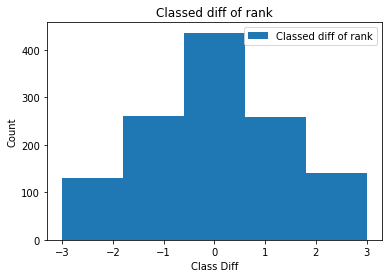

In [58]:

fig, ax = plt.subplots()
# x = range(len(pred_rank))
# ax.plot(x, pred_rank - true_rank, '-b', label='pred')
ax.hist(np.array(pred_rank_class) - np.array(true_rank_class), bins=5, label='Classed diff of rank')
plt.title("Classed diff of rank")
plt.xlabel("Class Diff")
plt.ylabel("Count")
leg = ax.legend();
# plt.savefig('TrainUgandaTestGhanaBucket.png')